# Logisitic Regression on Titanic Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
plt.rc("font", size = 14)
import seaborn as sns
sns.set(style="white") ## set the back ground on the plots as white
sns.set(style="whitegrid", color_codes=True)

## Importing the training and test data into dataframes using pandas

In [1]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


NameError: name 'pd' is not defined

In [2]:
train_df.head()

NameError: name 'train_df' is not defined

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print("The total number of samples in the test data is {}.".format(test_df.shape[0]))

The total number of samples in the test data is 418.


## Data Quality Analysis

In [7]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

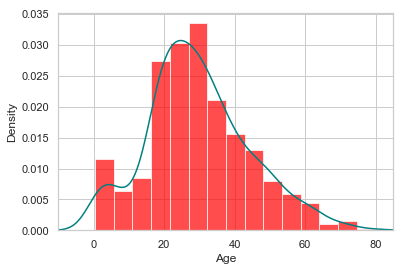

In [8]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='Red',alpha=0.7)
train_df["Age"].plot(kind="density", color = "teal")
ax.set(xlabel="Age")
plt.xlim(-10,85)
plt.show()

Boarded passengers group by port of embarkaction (C= Cherbourg, Q = Queenstown, S = Southhampton)
S    644
C    168
Q     77
Name: Embarked, dtype: int64


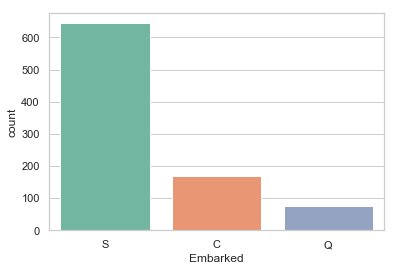

In [9]:
print("Boarded passengers group by port of embarkaction (C= Cherbourg, Q = Queenstown, S = Southhampton)")
print(train_df["Embarked"].value_counts())
sns.countplot(x = "Embarked", data = train_df, palette="Set2")
plt.show()


In [10]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].value_counts().idxmax(), inplace=True)
train_data["Embarked"].fillna(train_df["Embarked"].value_counts().idxmax(),inplace=True)
train_data.drop("Cabin", axis =1, inplace=True)

In [11]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


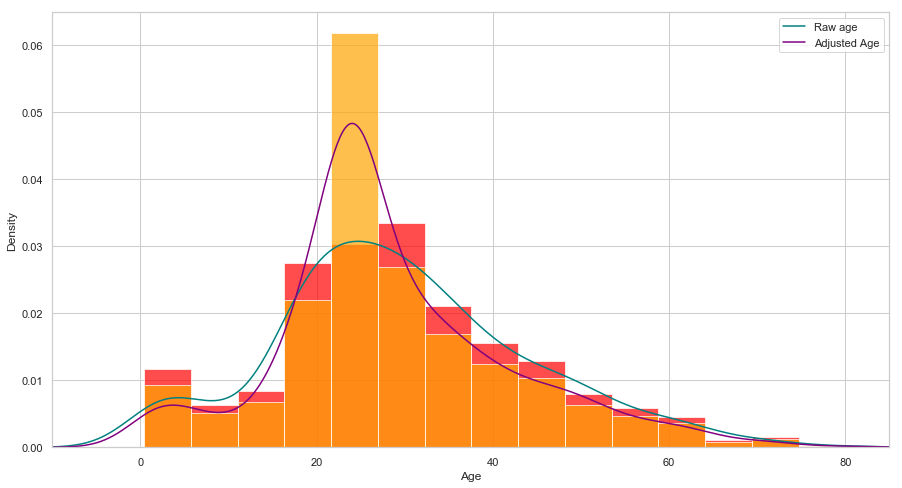

In [13]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density = True, stacked = True, color = "red", alpha = 0.7)
train_df["Age"].plot(kind = "density", color = "teal")
ax = train_data["Age"].hist(bins = 15, density = True, stacked = True, color = "orange", alpha = 0.7)
train_data["Age"].plot(kind = "density", color = "purple")
ax.legend(["Raw age","Adjusted Age"])
ax.set(xlabel="Age")
plt.xlim(-10,85)
plt.show()

In [14]:
train_data['TravelAlone']= np.where((train_data["SibSp"]+train_data["Parch"])>0,0,1)
train_data.drop("SibSp", axis=1, inplace=True)
train_data.drop("Parch", axis =1 , inplace = True)

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [16]:
training = pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female',axis=1,inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop("Name", axis=1, inplace=True)
training.drop("Ticket", axis=1, inplace=True)

final_train = training
final_train.head(10)


,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1
5,0,24.0,8.4583,1,0,0,1,0,1,0,1
6,0,54.0,51.8625,1,1,0,0,0,0,1,1
7,0,2.0,21.0750,0,0,0,1,0,0,1,1
8,1,27.0,11.1333,0,0,0,1,0,0,1,0
9,1,14.0,30.0708,0,0,1,0,1,0,0,0


In [17]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop("Cabin", axis=1, inplace=True)

test_data["TravelAlone"]=np.where((test_data["SibSp"]+test_data["Parch"])>0,0,1)

test_data.drop("SibSp", axis=1, inplace=True)
test_data.drop("Parch", axis=1, inplace=True)


In [18]:
testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop("Sex_female", axis=1, inplace=True)
testing.drop("PassengerId", axis=1, inplace=True)
testing.drop("Name", axis=1, inplace=True)
testing.drop("Ticket", axis=1, inplace=True)

final_test=testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


<function matplotlib.pyplot.show(*args, **kw)>

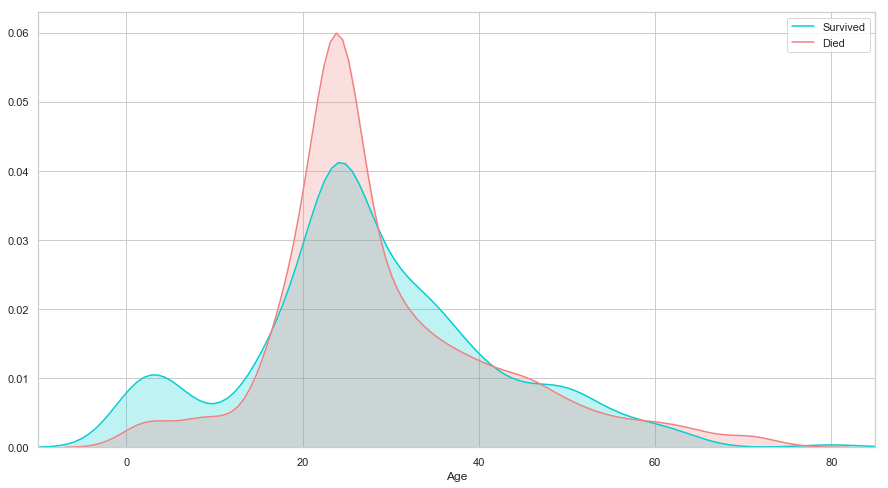

In [19]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived ==1], 
                 color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color = "lightcoral", shade = True)
plt.legend(["Survived","Died"])
ax.set(xlabel="Age")
plt.xlim(-10,85)
plt.show

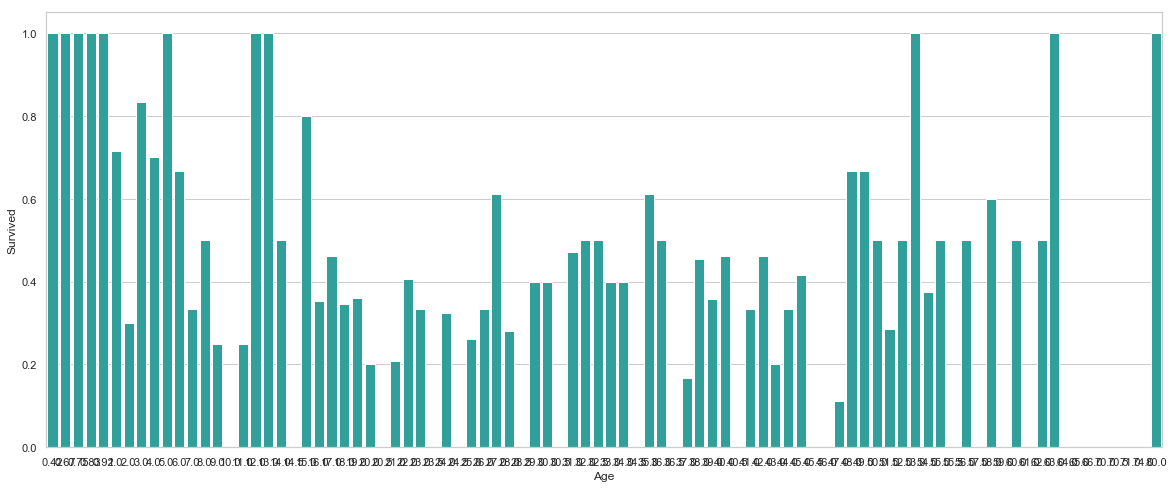

In [20]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age","Survived"]].groupby(["Age"], 
                                                             as_index=False).mean()
g = sns.barplot(x = "Age", y = "Survived", data = avg_survival_byage, 
                color="LightSeaGreen")
plt.show()

In [21]:
final_train["IsMinor"]= np.where(final_train["Age"]<=16,1,0)
final_test["IsMinor"]=np.where(final_test["Age"]<=16,1,0)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2",
       "Embarked_C","Embarked_S","Sex_male","IsMinor"]

x = final_train[cols]
y = final_train["Survived"]

model = LogisticRegression()
rfe = RFE(model,8)
rfe = rfe.fit(x,y)

print("seleted features: %s" %list(x.columns[rfe.support_]))

seleted features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1,cv=10, scoring="accuracy")

rfecv.fit(x,y)

print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features: %s" % list(x.columns[rfecv.support_]))


C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Optimal number of features: 8
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

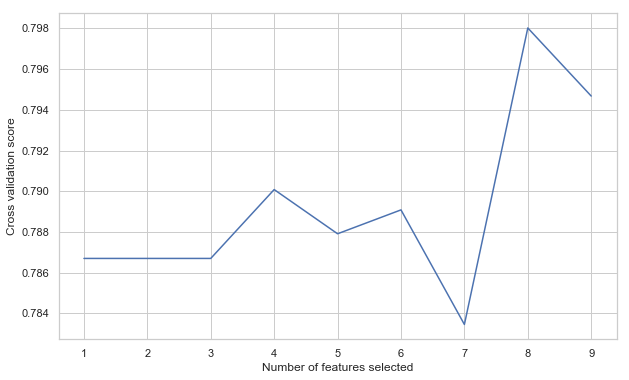

In [24]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

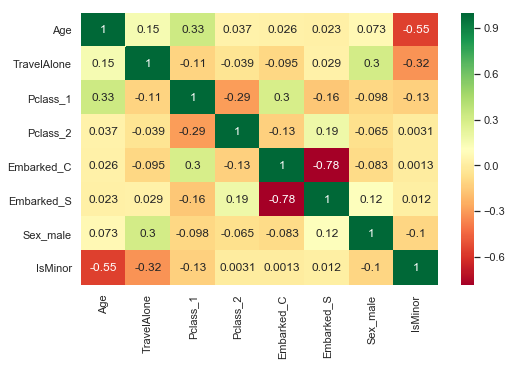

In [25]:
Selection_features = ["Age","TravelAlone","Pclass_1","Pclass_2",
       "Embarked_C","Embarked_S","Sex_male","IsMinor"]
x = final_train[Selection_features]
plt.subplots(figsize=(8,5))
sns.heatmap(x.corr(),annot = True,cmap = "RdYlGn")
plt.show()